**Problema:** Proyectar un vector $\mathbf{v}$ sobre un vector $\mathbf{w}$. La proyección, denotada como $\text{proj}_{\mathbf{w}}\mathbf{v}$, es el componente de $\mathbf{v}$ en la dirección de $\mathbf{w}$.

**Solución Analítica:** La fórmula para la proyección de $\mathbf{v}$ sobre $\mathbf{w}$ es:

$$ \text{proj}_{\mathbf{w}}\mathbf{v} = \left( \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|^2} \right) \mathbf{w} $$

donde $\mathbf{v} \cdot \mathbf{w}$ es el producto punto de $\mathbf{v}$ y $\mathbf{w}$, y $\|\mathbf{w}\|^2$ es el cuadrado de la norma (longitud) de $\mathbf{w}$.

**Solución Iterativa (Gradiente Descendente):** Podemos pensar en la proyección como encontrar un escalar $\alpha$ tal que $\alpha \mathbf{w}$ sea la mejor aproximación de $\mathbf{v}$ en el espacio generado por $\mathbf{w}$. Esto se reduce a minimizar el error cuadrático:

$$ E(\alpha) = \|\mathbf{v} - \alpha \mathbf{w}\|^2 $$

Para minimizar esta función de error con gradiente descendente, necesitamos calcular el gradiente con respecto a $\alpha$ y actualizar $\alpha$ iterativamente.

$$ \frac{dE}{d\alpha} = -2 \mathbf{w}^T (\mathbf{v} - \alpha \mathbf{w}) $$

La regla de actualización para $\alpha$ es:

$$ \alpha_{new} = \alpha_{old} - \eta \frac{dE}{d\alpha} $$

donde $\eta$ es la tasa de aprendizaje.

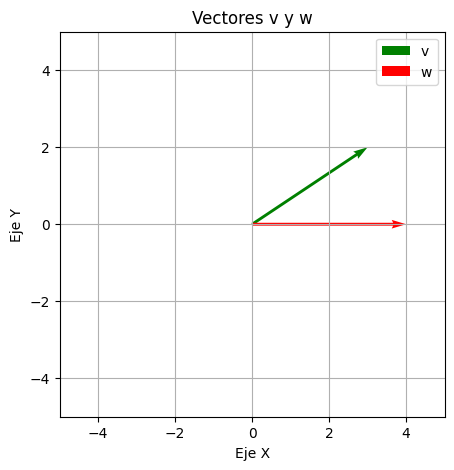

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los vectores
v = np.array([3, 2])
w = np.array([4, 0])

#Dibujar los vectores v y w
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r', label='w')

# Configurar el gráfico
max_val = max(max(abs(v)), max(abs(w))) + 1
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Vectores v y w")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


--- Solución Analítica ---
Producto punto (v . w): 14
Norma de w al cuadrado (||w||^2): 17
Escalar alfa (analítico): 0.8235294117647058

--- Solución Iterativa (Gradiente Descendente) ---
Tasa de aprendizaje: 0.01
Número de iteraciones: 30

Escalar alfa (iterativo final): 0.8235262349112595


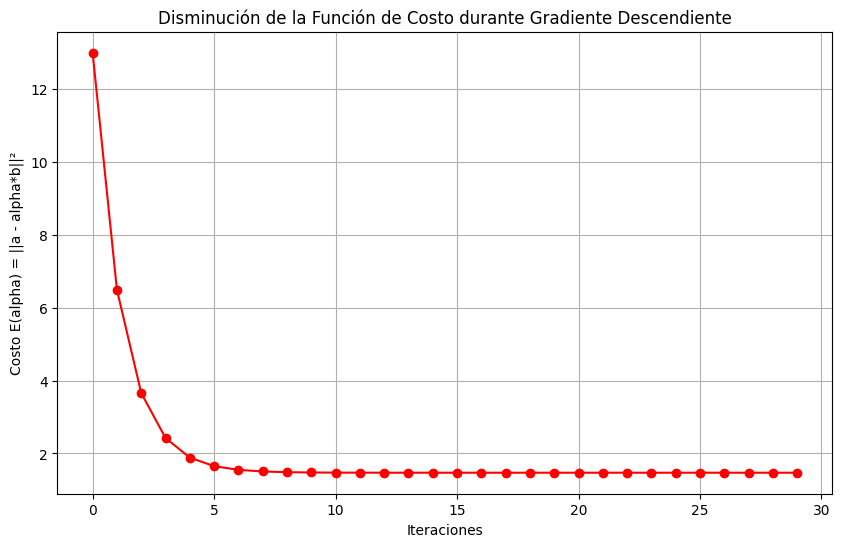

In [3]:
# Definir los vectores
v = np.array([3, 2])
w = np.array([4, 1])

# --- Solución Analítica ---
print("--- Solución Analítica ---")
# Calcular el producto punto de v y w
dot_product = np.dot(v, w)
print(f"Producto punto (v . w): {dot_product}")

# Calcular el cuadrado de la norma de w
norm_w_squared = np.dot(w, w)
print(f"Norma de w al cuadrado (||w||^2): {norm_w_squared}")

# Calcular el escalar alfa (coeficiente de proyección)
alpha_analytical = dot_product / norm_w_squared
print(f"Escalar alfa (analítico): {alpha_analytical}")


# --- Solución Iterativa (Gradiente Descendente) ---
print("\n--- Solución Iterativa (Gradiente Descendente) ---")
# Parámetros del descenso de gradiente
alpha_iterative = 0.0  # Puedes inicializar con un valor pequeño o aleatorio
learning_rate = 0.01
n_iterations = 30

print(f"Tasa de aprendizaje: {learning_rate}")
print(f"Número de iteraciones: {n_iterations}")

# Almacenar el historial de alfa y error para visualización
alpha_history = [alpha_iterative]
error_history = []

# Bucle de descenso de gradiente
for i in range(n_iterations):
    predicted_vector = alpha_iterative * w
    error_vector = v - predicted_vector
    error = np.dot(error_vector, error_vector)   # Función de costo ||v - alpha*w||^2
    error_history.append(error)

    gradient = -2 * np.dot(error_vector, w)
    alpha_iterative = alpha_iterative - learning_rate * gradient
    alpha_history.append(alpha_iterative)


print(f"\nEscalar alfa (iterativo final): {alpha_iterative}")



# --- Visualización ---
# Graficar evolución del costo
plt.figure(figsize=(10, 6))
plt.plot(error_history, marker='o', linestyle='-', color='r')
plt.title("Disminución de la Función de Costo durante Gradiente Descendiente")
plt.xlabel("Iteraciones")
plt.ylabel("Costo E(alpha) = ||a - alpha*b||²")
plt.grid(True)
plt.show()

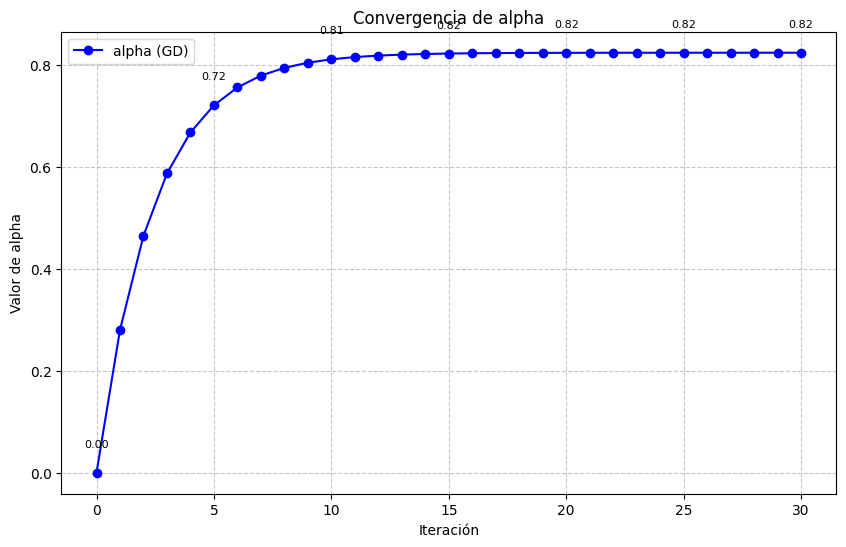

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_history[:51], marker='o', linestyle='-', color='b', label="alpha (GD)")

# Anotar el valor de alpha en cada 5 iteraciones
for i, val in enumerate(alpha_history[:51]):
    if i % 5 == 0:
        plt.text(i, val + 0.05, f"{val:.2f}", ha='center', fontsize=8)

plt.title("Convergencia de alpha")
plt.xlabel("Iteración")
plt.ylabel("Valor de alpha")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [6]:
print(f"Alfa calculado analíticamente: {alpha_analytical}")
print(f"Alfa final del descenso de gradiente descendiente: {alpha_iterative}")

print("\nComparación:")
print("El valor del alfa calculado analíticamente y el valor del alfa final del gradiente descendiente son muy similares, lo que indica que el gradiente descendiente converge a un valor cercano a la solución analítica.")

Alfa calculado analíticamente: 0.8235294117647058
Alfa final del descenso de gradiente descendiente: 0.8235262349112595

Comparación:
El valor del alfa calculado analíticamente y el valor del alfa final del gradiente descendiente son muy similares, lo que indica que el gradiente descendiente converge a un valor cercano a la solución analítica.
